In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd

rc('text',usetex = True)
rc('font', family='serif')

from scipy.optimize import curve_fit

In [11]:
workbook = xlrd.open_workbook('Input.xlsx')
worksheet = workbook.sheet_by_name('Data')

In [12]:
N = 41
R1 = zeros(N)
R2 = zeros(N)
R3 = zeros(N)
R4 = zeros(N)
h = zeros(N)
Pi1 = zeros(N)
Pi2 = zeros(N)
B = zeros(N)

for i in range(N):
    R1[i] = worksheet.cell(0, i).value
    R2[i] = worksheet.cell(1, i).value
    R3[i] = worksheet.cell(2, i).value
    R4[i] = worksheet.cell(3, i).value
    h[i] = worksheet.cell(4, i).value
    B[i] = worksheet.cell(5, i).value
    #B[i] = worksheet.cell(6, i).value

In [13]:
h

array([1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
       1.4, 1.4])

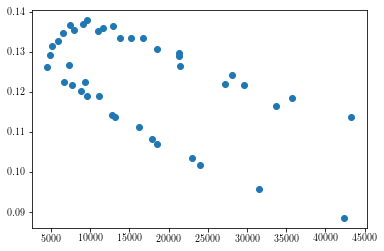

In [14]:
plt.plot((R4**2 - R3**2 + R2**2-20**2),B**2*(R3**2-R2**2)/(R4**2 - R3**2+R2**2-20**2)/h**2,'o')

In [15]:
def eta(X,a,b,c,d,e): 
    P1,P2,P3,P4= X
    return (a*(P1**b)*(P2**c)*(P3)**d*P4**e)

In [16]:
M = curve_fit(eta,(R2,R3,R4,h),B)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M[0]

array([ 0.17225372,  0.44005854, -1.52059856,  1.31112856,  0.59874638])

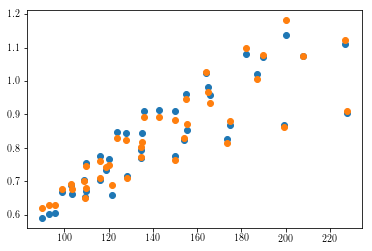

In [20]:
plt.plot(R4,B,'o')
plt.plot(R4,eta((R2,R3,R4,h),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4]),'o')

In [18]:
Erro = abs(B- eta((R2,R3,R4,h),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4]))/(B)*100

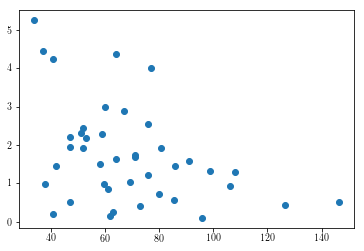

In [19]:
plt.plot(R2,Erro,'o')